In [1]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [2]:
xs_train, ys_train = datasets.load_svmlight_file('./a9a.csv', n_features=123)
xs_val, ys_val = datasets.load_svmlight_file('./a9a_t.csv', n_features=123)

xs_train = xs_train.A # numpy
xs_val = xs_val.A

xs_train = np.c_[xs_train, np.ones(len(xs_train))]
xs_val = np.c_[xs_val, np.ones(len(xs_val))]

In [3]:
alpha = 0.5 # (0, 1)

def getLoss(xs, ys):
    loss = 0
    grad = 0
    for x, y in zip(xs, ys):
        arg = 1 - y * W.T.dot(x)[0]
        loss += np.maximum(0, arg)
        grad += 0 if arg < 0 else y * x
        
    loss += alpha + np.linalg.norm(W.reshape((-1, 1))) / 2
    loss /= len(xs)

    grad = 2 * alpha * W - grad.reshape(-1, 1)
    grad /= len(xs)
    
    return loss, grad

# 接受率
def getAcc(xs, ys):
    acc = 0
    for x, y in zip(xs, ys):
        y_calc = W.T.dot(x)
        y_calc = 1 if y_calc >= 0 else -1 # 阈值
        if (y == y_calc):
            acc += 1 
    acc /= len(xs)
    return acc

SVM Hinge 损失函数：
$$
\hat{y_i} = W^Tx_i \\
Loss = \sum_{i = 0}^{\#x}[\max(0, 1 - y_i\hat{y_i})] + \lambda\|W\|^2_2 \\
\frac {\partial Loss} {\partial W} = 2 \lambda W - \sum_{i = 0}^{\#x}(1 - y_i\hat{y_i} > 0 \;?\; y_i * x_i : 0) \\
\lambda := \frac{1}{2C}\in(0, 1)\;(C>0\;为惩罚参数，越大惩罚越大)
$$

In [4]:
W = np.random.random([124, 1])
lr = 1e-3

losses_train, losses_val = [], []
acc_val = []

show_epoch = 10 # 显示
batch_size = 100 # 批次大小

epoches = 200
batches = len(xs_train) // batch_size

for epoch in range(epoches):
    for batch in range(batches):
        s = batch * batch_size
        e = s + batch_size
        
        loss_train, grad = getLoss(xs_train[s:e], ys_train[s:e])
        W = W - lr * grad # SGD
        
    loss_val, _ = getLoss(xs_val, ys_val)
    losses_train.append(loss_train)    
    losses_val.append(loss_val)
    
    acc = getAcc(xs_val, ys_val)
    acc_val.append(acc)
    
    if epoch % show_epoch == 0:
        print("epoch: ", epoch, "loss_train: ", loss_train, " loss_val: ", loss_val, "acc_val: ", acc)

epoch:  0 loss_train:  5.588934083046845  loss_val:  5.621389614853531 acc_val:  0.23622627602727106
epoch:  10 loss_train:  1.0301860259742568  loss_val:  1.1070240655988324 acc_val:  0.5093053252257232
epoch:  20 loss_train:  0.6009120987162754  loss_val:  0.6126985046877221 acc_val:  0.7437503838830538
epoch:  30 loss_train:  0.5541145105910732  loss_val:  0.5647829843219507 acc_val:  0.762238191757263
epoch:  40 loss_train:  0.5170666089911107  loss_val:  0.532193329154958 acc_val:  0.7740925004606597
epoch:  50 loss_train:  0.4892228326190589  loss_val:  0.5081090436828637 acc_val:  0.7828757447331245
epoch:  60 loss_train:  0.4690486605024715  loss_val:  0.48918506638909665 acc_val:  0.7904305632332166
epoch:  70 loss_train:  0.45241464603206133  loss_val:  0.4742109278895289 acc_val:  0.7971254836926479
epoch:  80 loss_train:  0.4402505033376876  loss_val:  0.46182685861349193 acc_val:  0.8023462932252319
epoch:  90 loss_train:  0.43036487531995316  loss_val:  0.4513041177306220

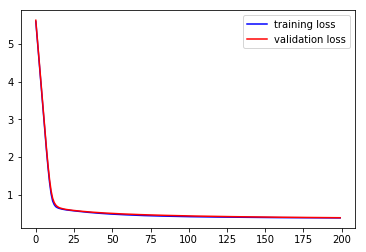

In [5]:
plt.plot([i for i in range(len(losses_train))], losses_train, 'b')
plt.plot([i for i in range(len(losses_val))], losses_val, 'r')
plt.legend(["training loss","validation loss"])
plt.savefig('./lab_2_2_1.pdf')
plt.show()

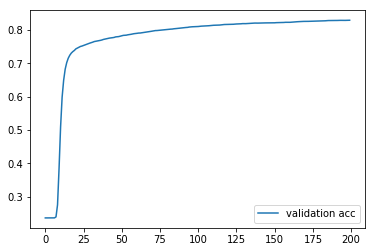

In [6]:
plt.plot([i for i in range(len(acc_val))], acc_val)
plt.legend(["validation acc"])
plt.savefig('./lab_2_2_2.pdf')
plt.show()